In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
ssd_df = pd.read_csv("C:/Users/dell/Documents/Codsoft/Task 4/spam.csv", encoding='latin-1', engine = "python", usecols = ['v1','v2'])

In [3]:
ssd_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ssd_df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
ssd_df.shape

(5572, 2)

In [6]:
ssd_df.size

11144

In [7]:
ssd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
ssd_df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
ssd_df.columns=["label", "the_message"]

In [10]:
ssd_df.head()

,label,the_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
ssd_df.isnull().values.any()

False

In [12]:
ssd_df.isnull().sum()

label          0
the_message    0
dtype: int64

In [13]:
ssd_df.duplicated().values.any()

True

In [14]:
ssd_df.duplicated().sum()

403

In [15]:
ssd_df.drop_duplicates(inplace=True)

In [16]:
ssd_df.describe()

,label,the_message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
ssd_df.head()

,label,the_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Record Visualization

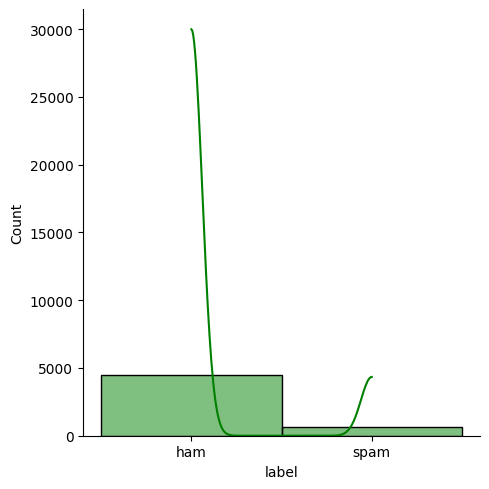

In [18]:
sns.displot(ssd_df.label, kde =True, color = "green")

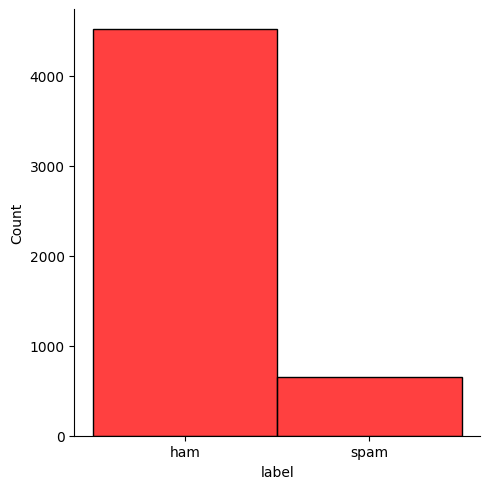

In [19]:
sns.displot(ssd_df.label, color = "red")

LabelEncoder to encode categorical variable(label) to numeric.

In [20]:
encoder = LabelEncoder()
ssd_df["label"] = encoder.fit_transform(ssd_df["label"].values)

In [21]:
ssd_df

,label,the_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


TF-IDF Vectorization

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
x = vectorizer.fit_transform(ssd_df["the_message"])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y =ssd_df["label"]

In [25]:
x.shape

(5169, 8672)

In [26]:
y.shape

(5169,)

In [27]:
ssd_df.count()

label          5169
the_message    5169
dtype: int64

Spam label Visualization on the basis of records in pie-chart

In [28]:
a, b = len(ssd_df[ssd_df["label"] == 0]), len(ssd_df[ssd_df["label"] == 1])

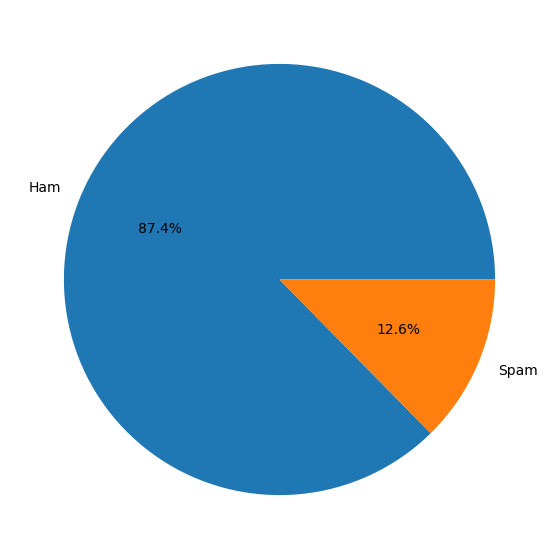

In [29]:
label = np.array(["Ham", "Spam"])
values = np.array([a, b])
mat.figure(figsize=(7, 7))
mat.pie(values, labels=label, autopct="%.1f%%")
mat.show()

Preprocess the data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training Naive Bayes Classifier

In [31]:
nb_model = MultinomialNB()

In [32]:
nb_model.fit(x_train, y_train)

MultinomialNB()

In [33]:
nb_predictions = nb_model.predict(x_test)

In [34]:
print("Naive Bayes Model: ")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))
print("Precision_score: ", precision_score(y_test, nb_predictions))
print("Recall_score: ", recall_score(y_test, nb_predictions))
print("f1_score: ", f1_score(y_test, nb_predictions))

Naive Bayes Model: 
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  1.0
Recall_score:  0.6827586206896552
f1_score:  0.8114754098360656


Training Logistic Regression Model

In [35]:
lr_model = LogisticRegression()

In [36]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [37]:
lr_predictions = lr_model.predict(x_test)

In [38]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model: 
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy:  0.9555125725338491
r2_Score:  0.6310150886311625
Precision_score:  0.9714285714285714
Recall_score:  0.7034482758620689
f1_score:  0.816


Training Support Vector Machine (SVM) Model

In [39]:
svm_model = SVC(kernel='linear')

In [40]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [41]:
svm_predictions = svm_model.predict(x_test)

In [42]:
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
print("Accuracy: ", accuracy_score(y_test, svm_predictions))
print("r2_Score: ", r2_score(y_test, svm_predictions))
print("Precision_score: ", precision_score(y_test, svm_predictions))
print("Recall_score: ", recall_score(y_test, svm_predictions))
print("f1_score: ", f1_score(y_test, svm_predictions))

Support Vector Machine (SVM) Model:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy:  0.9835589941972921
r2_Score:  0.8636360110158644
Precision_score:  0.9776119402985075
Recall_score:  0.903448275862069
f1_score:  0.9390681003584229
